In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns; sns.set_theme()
import datetime
from collections import namedtuple

In [2]:
covid = pd.read_csv('covid_0.csv')
covid.head()


,Entity,Code,Date,school_closures,international_travel_controls,restriction_gatherings,cancel_public_events,public_information_campaigns,restrictions_internal_movements,income_support,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
0,Afghanistan,AFG,2020-06-01,3.0,3.0,4.0,2.0,2.0,2.0,0.0,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
1,Afghanistan,AFG,2020-06-08,3.0,3.0,4.0,2.0,2.0,2.0,0.0,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
2,Afghanistan,AFG,2020-06-15,3.0,1.0,4.0,2.0,2.0,2.0,0.0,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
3,Afghanistan,AFG,2020-06-22,3.0,1.0,4.0,2.0,2.0,2.0,0.0,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
4,Afghanistan,AFG,2020-06-29,3.0,1.0,4.0,2.0,2.0,2.0,0.0,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN


In [3]:
# change covid.Date from string to datetime format
pd.to_datetime(covid['Date'], format='%Y-%m-%d')

# get all column names, seperate categorical and continuous columns
allcols = list(covid.columns)
catvar = allcols[:15]
contvar = allcols[15:]
contvar.pop(29) # column test_units, unused

# create a grouped version
# group by continent and date
covidgrouped = covid
covidgrouped.set_index('Date', inplace=True)
covidgrouped = covidgrouped.groupby(['continent', 'Date'])
covidgrouped.head()

        Entity Code        Date  school_closures  \
0  Afghanistan  AFG  2020-06-01              3.0   
1  Afghanistan  AFG  2020-06-08              3.0   
2  Afghanistan  AFG  2020-06-15              3.0   
3  Afghanistan  AFG  2020-06-22              3.0   
4  Afghanistan  AFG  2020-06-29              3.0   

   international_travel_controls  restriction_gatherings  \
0                            3.0                     4.0   
1                            3.0                     4.0   
2                            1.0                     4.0   
3                            1.0                     4.0   
4                            1.0                     4.0   

   cancel_public_events  public_information_campaigns  \
0                   2.0                           2.0   
1                   2.0                           2.0   
2                   2.0                           2.0   
3                   2.0                           2.0   
4                   2.0                  

,Entity,Code,school_closures,international_travel_controls,restriction_gatherings,cancel_public_events,public_information_campaigns,restrictions_internal_movements,income_support,facial_coverings,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
Date,,,,,,,,,,,,,,,,,,,,,
2020-06-01,Afghanistan,AFG,3.0,3.0,4.0,2.0,2.0,2.0,0.0,1.0,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
2020-06-08,Afghanistan,AFG,3.0,3.0,4.0,2.0,2.0,2.0,0.0,3.0,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
2020-06-15,Afghanistan,AFG,3.0,1.0,4.0,2.0,2.0,2.0,0.0,3.0,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
2020-06-22,Afghanistan,AFG,3.0,1.0,4.0,2.0,2.0,2.0,0.0,3.0,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
2020-06-29,Afghanistan,AFG,3.0,1.0,4.0,2.0,2.0,2.0,0.0,3.0,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-19,Solomon Islands,SLB,0.0,3.0,0.0,1.0,2.0,1.0,0.0,0.0,...,25.1,459.780,18.68,NaN,NaN,35.890,1.4,73.00,0.567,NaN
2021-04-26,Solomon Islands,SLB,0.0,3.0,0.0,1.0,2.0,1.0,0.0,0.0,...,25.1,459.780,18.68,NaN,NaN,35.890,1.4,73.00,0.567,NaN
2021-05-03,Solomon Islands,SLB,0.0,3.0,0.0,1.0,2.0,0.0,0.0,0.0,...,25.1,459.780,18.68,NaN,NaN,35.890,1.4,73.00,0.567,NaN


<AxesSubplot:>

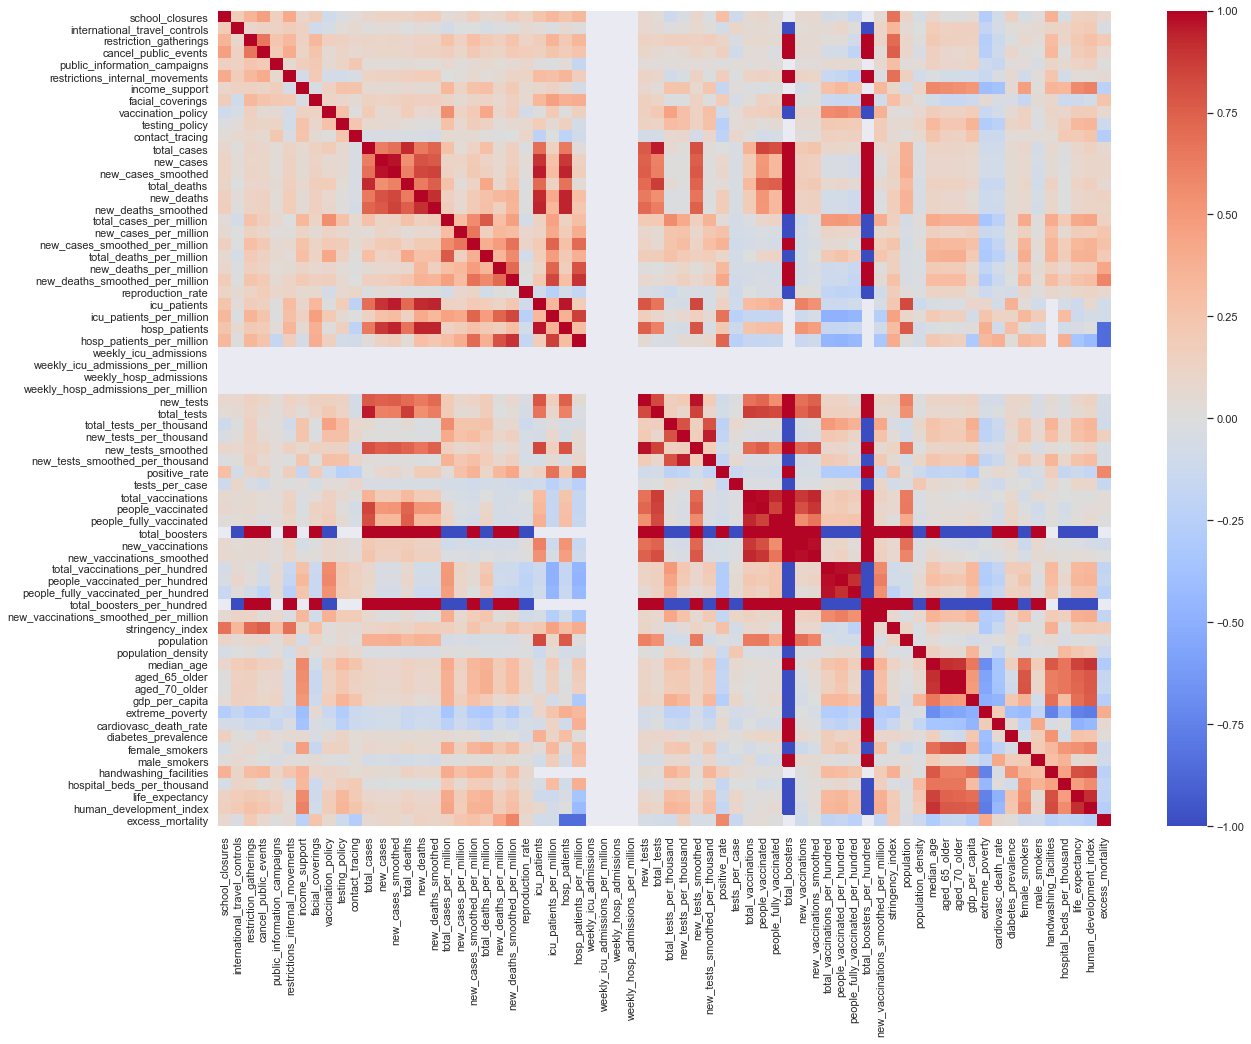

In [4]:
# plot correlation heatmap
plt.subplots(figsize=(20,15))
sns.heatmap(covid.drop(['Entity','Code'], axis=1).corr(), vmin=-1, vmax=1, annot=False, cmap="coolwarm")

In [5]:
# Line plot: One continuous variable against time, with all countries in one plot (coloured by country)
# Repeat for each continuous variable
figure(dpi=200)

# saves one figure for each variable, to the folder that the notebook is in
count = 1
for var in contvar:
    print(str(count)+'/57')
    widecovid = pd.pivot_table(covid, values=var, index='Entity', columns='Date')
    
    for country in widecovid.index:
        plt.plot(widecovid.loc[country],
                 '-o',
                 ms=0.5,
                 linewidth=0.5)
    
    # rotate xticks
    plt.xticks(rotation=90, fontsize=5)

    plt.savefig(var+'.png', dpi=1200)
    plt.close()
    count += 1
    


1/57
2/57
3/57
4/57
5/57
6/57
7/57
8/57
9/57
10/57
11/57
12/57
13/57
14/57
15/57
16/57
17/57
18/57
19/57
20/57
21/57
22/57
23/57
24/57
25/57
26/57
27/57
28/57
29/57
30/57
31/57
32/57
33/57
34/57
35/57
36/57
37/57
38/57
39/57
40/57
41/57
42/57
43/57
44/57
45/57
46/57
47/57
48/57
49/57
50/57
51/57
52/57
53/57
54/57
55/57
56/57
57/57


In [ ]:
# set the colour mapping for each continent
continents = {'Africa': 'orange', 'Asia':'b', 'Europe':'r', 'North America':'c', 'Oceania':'m', 'South America':'g'}

In [6]:
# Line plot: One continuous variable against time, with all countries in one plot (coloured by continent)
# Repeat for each continuous variable
figure(dpi=200)

# create dataframe to match country to its continent
countries = covid.drop_duplicates(subset='Entity')[['Entity', 'continent']]
countries.index = countries.Entity

# saves one figure for each variable, to the folder that the notebook is in
count = 1
for var in contvar:
    print(str(count)+'/57')
    widecovid = pd.pivot_table(covid, values=var, index='Entity', columns='Date')
    
    for country in widecovid.index:
        plt.plot(widecovid.loc[country],
                 '-o',
                 ms=0.5,
                 linewidth=0.5,
                 c=continents[countries.loc[country, 'continent']],
                 label=countries.loc[country, 'continent'])
    
    # rotate xticks
    plt.xticks(rotation=90, fontsize=5)
    
    # remove duplicate labels in legend
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys(), loc='upper left')
    
    plt.savefig('regional '+var+'.png', dpi=1200)
    plt.close()
    count += 1
    


,Entity,continent
Entity,,
Afghanistan,Afghanistan,Asia
Albania,Albania,Europe
Algeria,Algeria,Africa
Andorra,Andorra,Europe
Angola,Angola,Africa


1/57
2/57
3/57
4/57
5/57
6/57
7/57
8/57
9/57
10/57
11/57
12/57
13/57
14/57
15/57
16/57
17/57
18/57
19/57
20/57
21/57
22/57
23/57
24/57
25/57
26/57
27/57
28/57
29/57
30/57
31/57
32/57
33/57
34/57
35/57
36/57
37/57
38/57
39/57
40/57
41/57
42/57
43/57
44/57
45/57
46/57
47/57
48/57
49/57
50/57
51/57
52/57
53/57
54/57
55/57
56/57
57/57


In [7]:
# Line plot: The mean of all countries by continent for one continuous variable, against time
# Repeat for each continuous variable
figure(dpi=200)

# saves one figure for each variable, to the folder that the notebook is in
count = 1
for var in contvar:
    print(str(count)+'/57')
    widecovid = pd.pivot_table(covidgrouped.mean(), values=var, index='continent', columns='Date')
    
    for continent in widecovid.index:
        plt.plot(widecovid.loc[continent],
                 '-o',
                 ms=0.5,
                 linewidth=0.5,
                 c=continents[continent],
                 label=continent)
    
    # rotate xticks
    plt.xticks(rotation=90, fontsize=5)
    
    plt.legend()
    plt.savefig('mean '+var+'.png', dpi=1200)
    plt.close()
    count += 1



1/57
2/57
3/57
4/57
5/57
6/57
7/57
8/57
9/57
10/57
11/57
12/57
13/57
14/57
15/57
16/57
17/57


No handles with labels found to put in legend.


18/57


No handles with labels found to put in legend.


19/57


No handles with labels found to put in legend.


20/57


No handles with labels found to put in legend.


21/57
22/57
23/57
24/57
25/57
26/57
27/57
28/57
29/57
30/57
31/57
32/57
33/57
34/57
35/57
36/57
37/57
38/57
39/57
40/57
41/57
42/57
43/57
44/57
45/57
46/57
47/57
48/57
49/57
50/57
51/57
52/57
53/57
54/57
55/57
56/57
57/57


In [2]:
# change covid.Date from string to datetime format%d/%m/%Y
covidlabel = pd.read_csv('data_label.csv')
covidlabel = covidlabel.iloc[:, 2:].copy()
covidlabel['Date'] = pd.to_datetime(covidlabel['Date'], format='%d/%m/%Y')

# get all column names, seperate categorical and continuous columns
allcolslabel = list(covidlabel.columns)
catvarlabel = allcolslabel[3:14]
catvarlabel.append('international_travel_controls_binary')
contvarlabel = allcolslabel[14:-3]

'''
# create a grouped version
# group by continent and date
covidgrouped = covid.copy()
covidgrouped.set_index('Date', inplace=True)
#covidgrouped = covidgrouped.groupby(['continent', 'Date'])
covidgrouped
'''

"\n# create a grouped version\n# group by continent and date\ncovidgrouped = covid.copy()\ncovidgrouped.set_index('Date', inplace=True)\n#covidgrouped = covidgrouped.groupby(['continent', 'Date'])\ncovidgrouped\n"

1/ 13
2/ 13
3/ 13
4/ 13
5/ 13
6/ 13
7/ 13
8/ 13
9/ 13
10/ 13
11/ 13
12/ 13
13/ 13


<ipython-input-6-a5621e771c4c>:45: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


([<matplotlib.axis.XTick at 0x1ee12898c10>,
 [Text(0.3333333333333333, 0, 'Not Open'),
  Text(0.6666666666666666, 0, 'Open')])

<Figure size 1200x800 with 0 Axes>

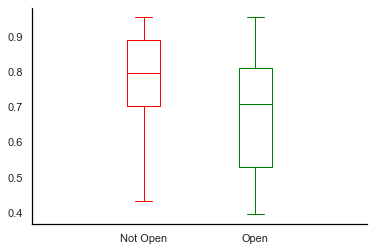

In [6]:
# Box plot: One continuous variable against y output
# Repeat for each continuous variable
figure(dpi=200)


def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color)

# saves one figure for each variable, to a folder 'continuous' that the notebook is in
count = 1
for var in contvarlabel:
    print(str(count)+'/', len(contvarlabel))
    df_temp = covidlabel[[var, 'label']]
    plt.figure()
    ax = plt.axes()
    ax.set_facecolor("white")
    ax.yaxis.label.set_color('red')
    ax.xaxis.label.set_color('red')
    ax.spines['left'].set_color('black')
    ax.spines['bottom'].set_color('black')
    df_temp_0 = df_temp[df_temp['label'] == 0]
    df_temp_1 = df_temp[df_temp['label'] == 1]
    zero = 'red'
    one = 'green'
    plt.boxplot(df_temp_0[var], positions = [1/3], sym = '', widths=0.1, boxprops = {'color':zero}, whiskerprops = {'color':zero}, capprops = {'color':zero}, medianprops = {'color':zero})
    plt.boxplot(df_temp_1[var], positions = [2/3], sym = '', widths=0.1, boxprops = {'color':one}, whiskerprops = {'color':one}, capprops = {'color':one}, medianprops = {'color':one})

    plt.xlim(0, 1)
    ticks = ["Not Open", "Open"]
    plt.xticks([1/3, 2/3], ticks)

    plt.savefig('continuous/'+var+'.png', dpi=1200)
    plt.close()
    
    count += 1
plt.figure()
df_temp_0 = df_temp[df_temp['label'] == 0]
df_temp_1 = df_temp[df_temp['label'] == 1]
plt.boxplot(df_temp_0[var], positions = [1/3], sym = '', widths=0.1, boxprops = {'color':zero}, whiskerprops = {'color':zero}, capprops = {'color':zero}, medianprops = {'color':zero})
plt.boxplot(df_temp_1[var], positions = [2/3], sym = '', widths=0.1, boxprops = {'color':one}, whiskerprops = {'color':one}, capprops = {'color':one}, medianprops = {'color':one})

ax = plt.axes()
ax.set_facecolor("white")
ax.yaxis.label.set_color('red')
ax.xaxis.label.set_color('red')
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
plt.xlim(0, 1)
ticks = ["Not Open", "Open"]
plt.xticks([1/3, 2/3], ticks)

In [7]:
# Grouped bar graph: Count of y output against one categorical variable
# Repeat for each continuous variable
figure(dpi=200)


def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color)

# saves one figure for each variable, to the folder that the notebook is in
count = 1
for var in catvarlabel:
    print(str(count)+'/', len(catvarlabel))
    df_temp = covidlabel[[var, 'label']].copy()
    labellings = list(set(df_temp[var].values))
    labellings.sort()
    df_long = pd.DataFrame()
    for lab in labellings:
        df = df_temp[df_temp[var] == lab]
        numbers = df['label'].values
        ones = np.sum(numbers)
        zeroes = len(numbers) - ones
        df_new = pd.DataFrame([[lab, zeroes, 0], [lab, ones, 1]], columns = [var, 'count', 'label'])
        df_long = df_long.append(df_new)
        
    length = len(labellings)
 
    plt.figure()
    ax = plt.axes()
    ax.set_facecolor("white")
    ax.yaxis.label.set_color('black')
    ax.xaxis.label.set_color('red')
    ax.spines['left'].set_color('black')
    ax.spines['bottom'].set_color('black')
    
    # Params
    width = 0.2
    x_limit = length - 1
    ticks = []
    pos = []
    if length > 2:
        for i in range(1, length + 1):
            value = labellings[i-1]
            mid = x_limit * i/(length+1)       
            o = plt.bar(x = mid-0.1, height = df_long.loc[(df_long['label'] == 0) & (df_long[var] == value),'count'], width = 0.2, color = '#FF7F50')
            z = plt.bar(x = mid+0.1, height = df_long.loc[(df_long['label'] == 1) & (df_long[var] == value),'count'], width = 0.2, color = '#7CFC00')
            string = str(value) + '-label'
            ticks.append(string)
            pos.append(mid)
    else:
        for i in range(1, length + 1):
            value = labellings[i-1]
            mid = 0.3 + (i-1)*0.4   
            o = plt.bar(x = mid - 0.075, height = df_long.loc[(df_long['label'] == 0) & (df_long[var] == value),'count'], width = 0.15, color = '#FF7F50')
            z = plt.bar(x = mid + 0.075, height = df_long.loc[(df_long['label'] == 1) & (df_long[var] == value),'count'], width = 0.15, color = '#7CFC00')
            string = str(value) + '-value'
            ticks.append(string)
            pos.append(mid)
    plt.xlim(0, x_limit)
    plt.ylabel('Count')
    plt.xticks(pos, ticks)
    plt.legend([o, z], ['0', '1'], title = 'Label')
    plt.savefig('categorical/'+var+'.png', dpi=1200)
    plt.close()
    count += 1

df_long

1/ 12
2/ 12
3/ 12
4/ 12
5/ 12
6/ 12
7/ 12
8/ 12
9/ 12
10/ 12
11/ 12
12/ 12


,international_travel_controls_binary,count,label
0,0,3688,0
1,0,360,1
0,1,596,0
1,1,1881,1


<Figure size 1200x800 with 0 Axes>